In [1]:
!git clone https://github.com/tsotne95/FairnessCompas.git
%cd FairnessCompas


c:\Users\terdo\OneDrive\Documents\CSCE 581\CSCE581-Spring2026-Terdooachu\Quiz1\Q1_COMPAS\FairnessCompas


fatal: destination path 'FairnessCompas' already exists and is not an empty directory.


In [2]:
import os
os.listdir()

['.git',
 'compas-scores-two-years.csv',
 'FairnessCompas',
 'Fairness_in_Classification_on_the_COMPAS_dataset.ipynb',
 'LICENSE',
 'README.md']

In [3]:
import pandas as pd

df = pd.read_csv("compas-scores-two-years.csv")

df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [4]:
print(df.shape)
df.info()

(7214, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count 

In [5]:
df_small = df[['race','sex','decile_score','two_year_recid','priors_count','age']]

df_small.head()


,race,sex,decile_score,two_year_recid,priors_count,age
0,Other,Male,1,0,0,69
1,African-American,Male,3,1,0,34
2,African-American,Male,4,1,4,24
3,African-American,Male,8,0,1,23
4,Other,Male,1,0,2,43


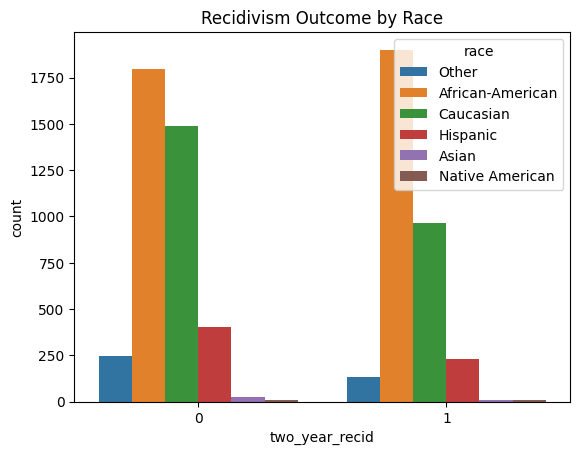

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_small, x='two_year_recid', hue='race')
plt.title("Recidivism Outcome by Race")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [8]:
df_model = df_small.copy()

le_race = LabelEncoder()
le_sex = LabelEncoder()

df_model['race'] = le_race.fit_transform(df_model['race'])
df_model['sex'] = le_sex.fit_transform(df_model['sex'])

df_model.head()


,race,sex,decile_score,two_year_recid,priors_count,age
0,5,1,1,0,0,69
1,0,1,3,1,0,34
2,0,1,4,1,4,24
3,0,1,8,0,1,23
4,5,1,1,0,2,43


In [9]:
X = df_model[['race','sex','priors_count','age']]
y = df_model['two_year_recid']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [12]:
y_pred = model.predict(X_test)


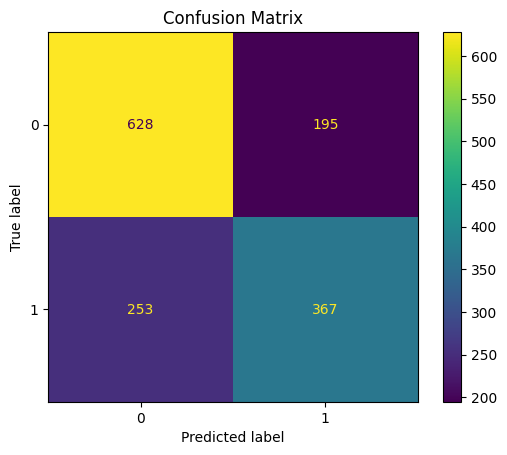

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()


In [14]:
X_test_with_race = X_test.copy()
X_test_with_race['true'] = y_test.values
X_test_with_race['pred'] = y_pred


In [15]:
race_errors = X_test_with_race.groupby('race')[['true','pred']].apply(
    lambda x: (x['true'] != x['pred']).mean()
)

race_errors


race
0    0.314637
1    0.400000
2    0.300990
3    0.290598
4    0.666667
5    0.341463
dtype: float64

In [16]:
dict(zip(le_race.transform(le_race.classes_), le_race.classes_))


{np.int64(0): 'African-American',
 np.int64(1): 'Asian',
 np.int64(2): 'Caucasian',
 np.int64(3): 'Hispanic',
 np.int64(4): 'Native American',
 np.int64(5): 'Other'}

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)


In [18]:
from sklearn.metrics import classification_report

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))

print("\nDecision Tree Results:")
print(classification_report(y_test, y_pred_tree))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       823
           1       0.65      0.59      0.62       620

    accuracy                           0.69      1443
   macro avg       0.68      0.68      0.68      1443
weighted avg       0.69      0.69      0.69      1443


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       823
           1       0.65      0.61      0.63       620

    accuracy                           0.69      1443
   macro avg       0.69      0.68      0.68      1443
weighted avg       0.69      0.69      0.69      1443



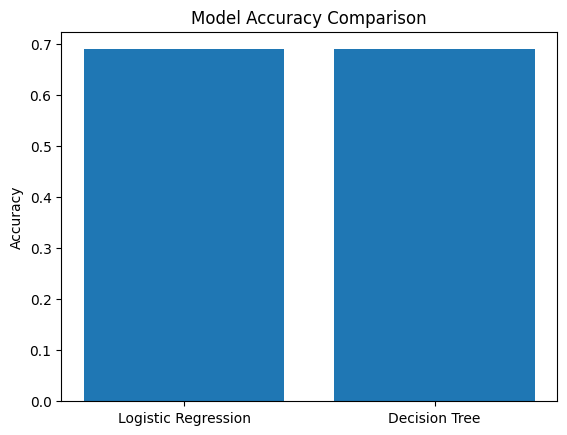

In [19]:
models = ['Logistic Regression', 'Decision Tree']
accuracy_scores = [0.69, 0.69]

import matplotlib.pyplot as plt

plt.bar(models, accuracy_scores)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
